#  How do we deploy the Chicago police force to efficiently fight crime?

In [1]:
import pandas              as pd # The gold standard of Python data analysis, to create and manipulate tables of data
import numpy               as np # The Python module for processing arrays which/Pandas is based on
import matplotlib.pyplot   as plt # The gold standard of Python data visualization, but can be complex to use
import seaborn             as sns; sns.set() # A package to make Matplotlib visualizations more aesthetic
import branca
import geopandas

import folium # package for making maps, please make sure to use a version older than 1.0.0.
from wordcloud import WordCloud # A package that will allow us to make a wordcloud
from scipy.stats import ttest_ind # A module for Python machine learning--we'll stick to T-Tests here
from IPython.display import display
from time_slider_choropleth import TimeSliderChoropleth
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)

ModuleNotFoundError: No module named 'branca'

In [2]:
folium.__version__

'0.9.1'

_"I think that's how Chicago got started. A bunch of people in New York said, 'Gee, I'm enjoying the crime and the poverty, but it just isn't cold enough. Let's go west."_ - Richard Jeni

_"Chicago is known for good steaks, expensive stores, and beautiful architecture. Unfortunately, the Windy City also enjoys a reputation for corrupt politics [and] violent crime."_ - Bob Barr

## Introduction (5 mts)

**Business Context.** Congratulations! You were recently promoted to regional Chief of Strategy of the Chicago Police d\Department. You have many years of experience with field work, but this is your first time having to think about the bigger picture. Chicago is a large city, and your resources are limited. Thus you need to devise a comprehensive plan to enhance the efficiency of police force deployment to fight crime. Making data-driven decisions is essential, even in law enforcement where prior knowledge usually dominates the decision-making process.

**Business Problem.** Your main task is to **explore the data and identify patterns of crime in Chicago, and come up with strategies to efficiently deploy your workforce to fight crime.** 

**Analytical Context.** So, you found a dataset available to the Chicago PD from 2017 with information on crimes committed throughout the city. In this case, we will focus on exploratory analysis to construct some preliminary strategies for police deployment. These strategies can be further consolidated or dismissed using more rigorous statistical analysis. One of the key aspects of this case is that our data contains records of crime incidents where often we do not have a clear definition of outcome (such as "severity" of a crime). We will discuss ways of dealing with such data, and how they can be incorporated to have meaningful conclusions. 

The case is structured as follows. We will (1) look at univariate summaries (2) come up with a preliminary strategy based on this (3) look at joint distributions, and revise our strategy, and finally (4) think about changing strategies depending on our priorities and severities of the crime.

## Exploring patterns associated with individual variables of interest

Let's read in and view our dataset. This dataset is downloaded from this [website](https://data.cityofchicago.org/Public-Safety/Crimes-2017/d62x-nvdr). It contains reported crime incidents (with the exception of murders, where data exists for each victim) that occured in the City of Chicago in 2017.

In [3]:
df = pd.read_csv('Chicago_crime_data.csv', dtype={'ID': object, 'beat_num': object})
df

ID Case Number            Date  \
0       11192233    JB100016  12/31/17 23:58   
1       11196379    JB105867  12/31/17 23:50   
2       11192540    JB100551  12/31/17 23:48   
3       11192239    JB100032  12/31/17 23:45   
4       11192254    JB100003  12/31/17 23:45   
5       11192231    JB100018  12/31/17 23:43   
6       11192238    JA569474  12/31/17 23:40   
7       11192213    JB100015  12/31/17 23:39   
8       11192991    JB100001  12/31/17 23:30   
9       11192682    JB100690  12/31/17 23:30   
10      11192349    JB100035  12/31/17 23:30   
11      11206183    JB119133  12/31/17 23:30   
12      11192413    JB100031  12/31/17 23:28   
13      11192385    JB100030  12/31/17 23:26   
14      11192266    JA569467  12/31/17 23:25   
15      11192368    JA569472  12/31/17 23:20   
16      11192302    JA569461  12/31/17 23:20   
17      11192237    JA569460  12/31/17 23:20   
18      11192198    JA569469  12/31/17 23:16   
19      11192221    JA569473  12/31/17 23:15   
20      11192209    JB100006  12/31/17 23:14   
21      11192216    JA569455  12/31/17 23:12   
22      11192264    JA569456  12/31/17 23:11   
23      11192279    JB100058  12/31/17 23:10   
24      11192204    JA569450  12/31/17 23:07   
25      11193107    JB101337  12/31/17 23:00   
26      11193671    JB101759  12/31/17 23:00   
27      11193298    JB101665  12/31/17 23:00   
28      11192687    JB100655  12/31/17 23:00   
29      11192657    JB100597  12/31/17 23:00   
...          ...         ...             ...   
268273  10939343    JA252267     1/1/17 0:00   
268274  11103097    JA450689     1/1/17 0:00   
268275  10979113    JA304447     1/1/17 0:00   
268276  11156625    JA521559     1/1/17 0:00   
268277  11614273    JC174951     1/1/17 0:00   
268278  11217575    JB133919     1/1/17 0:00   
268279  11095070    JA440244     1/1/17 0:00   
268280  10983012    JA307979     1/1/17 0:00   
268281  10983010    JA307926     1/1/17 0:00   
268282  11088530    JA426202     1/1/17 0:00   
268283  11010296    JA337038     1/1/17 0:00   
268284  11095178    JA440856     1/1/17 0:00   
268285  11095180    JA440688     1/1/17 0:00   
268286  11160883    JA526992     1/1/17 0:00   
268287  10993875    JA320714     1/1/17 0:00   
268288  11329960    JB283477     1/1/17 0:00   
268289  11160892    JA527074     1/1/17 0:00   
268290  11079429    JA420285     1/1/17 0:00   
268291  11722919    JC306738     1/1/17 0:00   
268292  11160897    JA527112     1/1/17 0:00   
268293  10802448    JA101652     1/1/17 0:00   
268294  10801104    JA100015     1/1/17 0:00   
268295  11488630    JB491364     1/1/17 0:00   
268296  11587511    JC142200     1/1/17 0:00   
268297  10967496    JA289346     1/1/17 0:00   
268298  11035993    JA367627     1/1/17 0:00   
268299  10942975    JA261045     1/1/17 0:00   
268300  10942796    JA260938     1/1/17 0:00   
268301  10801141    JA100083     1/1/17 0:00   
268302  11255786    JB185271     1/1/17 0:00   

                                      Block  IUCR                Primary Type  \
0                      046XX N ST LOUIS AVE   630                    BURGLARY   
1                  024XX N LAKE SHORE DR NB   460                     BATTERY   
2                       001XX E SUPERIOR ST   890                       THEFT   
3                          019XX S CANAL ST  1320             CRIMINAL DAMAGE   
4                          115XX S STATE ST  041A                     BATTERY   
5                          039XX N LONG AVE  1811                   NARCOTICS   
6                         048XX N AVERS AVE  1310             CRIMINAL DAMAGE   
7                     107XX S WENTWORTH AVE  502P               OTHER OFFENSE   
8                         087XX S PEORIA ST  1320             CRIMINAL DAMAGE   
9                        0000X W HUBBARD ST  1150          DECEPTIVE PRACTICE   
10                          012XX W 97TH ST   497                     BATTERY   
11                          039XX W 69TH ST   610                

We can see above that the table contains 22 columns and there are 268,303 records in total. Since each homicide case could have more than one row, the actual number of cases is smaller than 268,303. Blow is a brief description of each column:

|     Variable name    |                    Variable description                    |                                                                                                  Note                                                                                                  |
|:--------------------:|:----------------------------------------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
|          ID          |              Unique identifier for the record              |                                                                   Each victim in a single homicide case is assigned to a different ID                                                                  |
|      Case Number     | The Chicago Police Department RD (Records Division) number |                                                  Unique to the incident. Multiple IDs can share the same Case Number if the incident is a homicide case                                                 |
|         Date         |               Date when the incident occurred              |                                                                                Might be a best estimate for some records                                                                               |
|         Block        | The partially redacted address where the incident occurred |                                                                    The redacted address is in the same block as the actual address                                                                    |
|         IUCR         |          The Illinois Uniform Crime Reporting code         |                                Directly linked to the primary type and the description of the crime. See details [here]( https://data.cityofchicago.org/widgets/c7ck-438e)                                |
|     Primary Type     |          The primary description of the IUCR code          |      -                                                                                                                                                                                                  |
|      Description     |         The secondary description of the IUCR code         |     -                                                                                                                                                                                                   |
| Location Description |   Description of the location where the incident occurred  |    -                                                                                                                                                                                                    |
|        Arrest        |                  Whether an arrest as made                 |     -                                                                                                                                                                                                   |
|       Domestic       |          Whether the incident was domestic-related         |                                                                Domestic-related definition is based on the Illinois Domestic Violence Act                                                               |
|       beat_num       |         The police beat where the incident occurred        |          Smallest police geographic area - each beat has a dedicated police beat car. See details [here](https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Beats-current-/aerh-rz74)         |
|       District       |       The police district where the incident occurred      | Three to five beats make up a police sector and three sectors make up a police district. See details [here](https://data.cityofchicago.org/Public-Safety/Boundaries-Police-Districts-current-/fthy-xz3r) |
|         Ward         |            The ward where the incident occurred            |                          Wards are city council districts. See details [here](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Wards-2015-/sp34-6z76)                          |
|    Community Area    |       The community area where the incident occurred       |                                     See details [here](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6)                                    |
|       FBI Code       |   The crime classification as outlined in the FBI's NIBRS  |                         NIBRS stands for National Incident-Based Reporting System (NIBRS). See details [here]( http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html)                         |
|       Latitude       |  The latitude of the location where the incident occurred  |                                                   This location is shifted from the actual location for partial redaction but falls on the same block                                                  |
|       Longitude      |  The longitude of the location where the incident occurred |       -                                                                                                                                                                                                 |

There are quite a few factors, but most are either: (1) identifying information (e.g. `id`, `ICUR`); or (2) too granular to start with (e.g. `latitude`, `longitude`). Therefore, we will first focus on the following variables: `primary_type`, `description`, `location_description` (location types), `date` (time of occurrence) and `beat_num` (geographic location), which give valuable information without getting too granular too quickly. Our outcome of interest is the number of crime incidents.

### Investigating crimes by types and descriptions (10 mts)

Similar to the last EDA case, it makes sense to explore the relationship of `primary_type` and `description` with our outcome of interest, crime incidents. However, we cannot repeat the exact process where we look at the pairwise correlations between the variables of interest and the outcome. This is because both `primary_type` and `description` are categorical variables, so it would not make send to place them on a scatterplot and calculating correlations makes little sense.

Luckily, both variables are discrete so we can still count the total number of records which belong to a specific category for each of these two variables by using a **frequency table**. Note that `primary_type` and `description` are **nested variables** since no category within `description` appears in the same row as two different categories of `primary_type`:

In [4]:
df["Primary Type"].value_counts()

THEFT                                64356
BATTERY                              49218
CRIMINAL DAMAGE                      29043
ASSAULT                              19304
DECEPTIVE PRACTICE                   19204
OTHER OFFENSE                        17235
BURGLARY                             13000
ROBBERY                              11879
NARCOTICS                            11659
MOTOR VEHICLE THEFT                  11385
CRIMINAL TRESPASS                     6815
WEAPONS VIOLATION                     4686
OFFENSE INVOLVING CHILDREN            2282
CRIM SEXUAL ASSAULT                   1631
PUBLIC PEACE VIOLATION                1498
INTERFERENCE WITH PUBLIC OFFICER      1087
SEX OFFENSE                           1031
PROSTITUTION                           735
HOMICIDE                               675
ARSON                                  444
LIQUOR LAW VIOLATION                   191
GAMBLING                               191
KIDNAPPING                             190
STALKING   

We can see the most prevalent primary type of crime is theft, followed by battery and criminal damage. More severe types, such as homicide, arson and human trafficking, are very rare. A more detailed description of crime types is listed in the `Description` column. We can further break down the above frequencies by `Description` since `Primary Type` and `Description` are nested variables. The resulting frequency table is shown below:

In [5]:
df.groupby(["Primary Type","Description"])["ID"].count().reset_index(name="count")\
.sort_values(by="count", ascending = False).head(20)

Primary Type                          Description  count
309                THEFT                       $500 AND UNDER  24516
42               BATTERY              DOMESTIC BATTERY SIMPLE  23819
45               BATTERY                               SIMPLE  16185
314                THEFT                            OVER $500  15352
68       CRIMINAL DAMAGE                          TO PROPERTY  13843
70       CRIMINAL DAMAGE                           TO VEHICLE  13555
19               ASSAULT                               SIMPLE  12743
312                THEFT                        FROM BUILDING  10662
317                THEFT                         RETAIL THEFT  10460
140  MOTOR VEHICLE THEFT                           AUTOMOBILE   9834
47              BURGLARY                       FORCIBLE ENTRY   7506
89    DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   5157
49              BURGLARY                       UNLAWFUL ENTRY   4594
282              ROBBERY                       ARMED: HANDGUN   4550
84    DECEPTIVE PRACTICE                    CREDIT CARD FRAUD   3939
246        OTHER OFFENSE                     TELEPHONE THREAT   3924
72     CRIMINAL TRESPASS                              TO LAND   3850
322    WEAPONS VIOLATION             UNLAWFUL POSS OF HANDGUN   3597
292              ROBBERY                STRONGARM - NO WEAPON   3564
14               ASSAULT                  AGGRAVATED: HANDGUN   2891

Summarizing the data by this more detailed classification of crime types reveals what the prevalent crime descriptions are within each primary type. For example:

1. More than half of theft offenses involved items valued at $500 or less (petty theft)
2. Simple domestic battery is almost as prevalent as petty theft
3. Most criminal damage cases involved properties or vehicles

There are in fact 310 descriptions in total and listing them all here is not viable. However, we can use a visualization tool known as a **word cloud** to summarize the prevalent descriptions within each primary type. A word cloud visualizes the words within a collection of texts (in our case, the texts are all `Descriptions` for a specific primary type) and the size of each word is proportional to how often it appears in the datase. Below, we construct three word clouds for the top 3 most prevalent primary crime types:

In [6]:
# wordcloud for primary type defined by rank
def wordcloud_crime( df, rank ):
    df_filter = df[df["Primary Type"]==df["Primary Type"].value_counts().index[rank]]
    text = ' '.join(df_filter['Description'])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Crime type:  THEFT


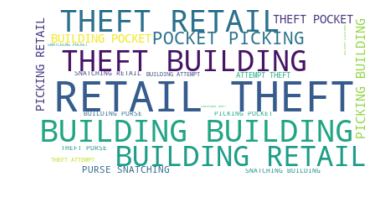

Crime type:  BATTERY


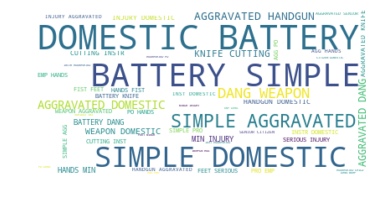

Crime type:  CRIMINAL DAMAGE


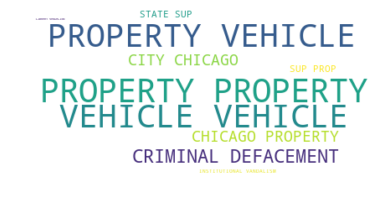

In [7]:
print("Crime type: ", df["Primary Type"].value_counts().index[0])
wordcloud_crime( df, 0 )
print("Crime type: ", df["Primary Type"].value_counts().index[1])
wordcloud_crime( df, 1 )
print("Crime type: ", df["Primary Type"].value_counts().index[2])
wordcloud_crime( df, 2 )

From the above, it seems that the words "building" and "retail" are strongly linked to theft offenses, indicating that theft likely mainly happened indoors and in malls or retail stores. Battery is strongly linked the word "domestic", implying that battery charges usually involved family members. Criminal damage was strongly associated with the words "property" and "vehicle".

### Exercise 1: (10 mts)

As we have seen with word clouds, it seems that a given type of crime is usually linked with certain types of locations (e.g. at home, in retail stores). Write code to investigate the crime patterns associated with types of crime locations. Based on the results, which types of locations are more likely to have crime?

**Answer**: Since `Location Description` is a discrete variable, we can use the same code as for analyzing `Primary Type`. Based on the results, we can find that street, residence, apartments and sidewalk account for around 50% of all incidents.

In [8]:
df["Location Description"].value_counts()

STREET                                                   59975
RESIDENCE                                                45880
APARTMENT                                                33448
SIDEWALK                                                 21006
OTHER                                                    11327
PARKING LOT/GARAGE(NON.RESID.)                            8247
RESTAURANT                                                6893
SMALL RETAIL STORE                                        6832
RESIDENTIAL YARD (FRONT/BACK)                             5311
ALLEY                                                     5283
VEHICLE NON-COMMERCIAL                                    4723
RESIDENCE PORCH/HALLWAY                                   4627
RESIDENCE-GARAGE                                          4587
DEPARTMENT STORE                                          4533
GAS STATION                                               3884
GROCERY FOOD STORE                                     

#### Contingency tables

So far, we have seen crime patterns linked with `Primary Type` and `Location Description` separately. It makes sense to see whether a certain combination of crime type and location type is prevalent or not. We know that both `Primary Type` and `Location Description` are discrete variables. We can therefore use a **contingency table** (cross table) to summarize the total number of incidents belong to a specific combination of values of `Primary Type` and `Location Descritpion`.

We cannot use the previous code where we analyzed `Primary Type` and `Description` together since unlike those two variables, `Location Description` and `Primary Type` are **NOT** nested variables. Below, we can see the results when the top 10 most prevalent crime locations are analyzed against the top 10 most prevalent crime types:

In [9]:
df_1 = df[df["Location Description"].isin(df["Location Description"].value_counts().index[:10]) & df["Primary Type"].isin(df["Primary Type"].value_counts().index[:10])]
pd.crosstab(df_1["Primary Type"],df_1["Location Description"])

Location Description  ALLEY  APARTMENT  OTHER  PARKING LOT/GARAGE(NON.RESID.)  \
Primary Type                                                                    
ASSAULT                 485       2839    753                             499   
BATTERY                1038      11706   1021                             849   
BURGLARY                 18       3956    494                              40   
CRIMINAL DAMAGE         434       3767    804                            1442   
DECEPTIVE PRACTICE       19       1762   2261                             201   
MOTOR VEHICLE THEFT     196         70    277                             861   
NARCOTICS               646        613    136                             319   
OTHER OFFENSE           158       2473   1355                             158   
ROBBERY                 929        235    230                             383   
THEFT                   629       3716   3313                            2931   

Location Description  RESIDENCE  RESIDENTIAL YARD (FRONT/BACK)  RESTAURANT  \
Primary Type                                                                 
ASSAULT                    3189                            495         541   
BATTERY                   10136                            815         692   
BURGLARY                   4170                             29         312   
CRIMINAL DAMAGE            5524                            828         433   
DECEPTIVE PRACTICE         6225                             20         925   
MOTOR VEHICLE THEFT         307                            299          15   
NARCOTICS                   730                            235          40   
OTHER OFFENSE              6697                            146         185   
ROBBERY                     234                            171         195   
THEFT                      5048                           1588        3101   

Location Description  SIDEWALK  SMALL RETAIL STORE  STREET  
Primary Type                                                
ASSAULT                   2189                 363    3533  
BATTERY                   6812                 321    6732  
BURGLARY                     6                 319      49  
CRIMINAL DAMAGE            251                 347    9997  
DECEPTIVE PRACTICE         226                 601     965  
MOTOR VEHICLE THEFT         29                   9    8217  
NARCOTICS                 3264                  28    3013  
OTHER OFFENSE              593                 175    3451  
ROBBERY                   3513                 366    3548  
THEFT                     2152                4048   15801

### Exercise 2:

#### 2.1

Based on the contingency table above, what are the hotspots for the top 10 most prevalent types of crime? Are they the same or not?

**Answer.** No, theft is markedly different from the others. Theft is spread widely across many locations, whereas the others are concentrated in a few spots.

#### 2.2

How can the above table help you deploy your workforce efficiently?

**Answer.** This analysis is most useful when we want to identify hotspots for a specific type of crime. For instance, if somehow the police department considers eliminating theft to be a priority, then the above table can tell us where we should deploy more police forces to combat theft. The table gives us the following insights:

1. Other than theft, all major types of crime tend to concentrate in fewer than five types of locations, which indicates location-specific patrolling is more efficient for combatting those types of crime.
2. Theft offenses tend to be spread across all types of locations. It is the type of crime that would require more resources to control.

### Investigating crime by timestamp (5 mts)

We now move on to investigate the relationship between crime incidents and time; i.e. the `date` variable we pointed out early on. Time is one of the most important dimensions for constructing an effective deployment plan, since we cannot patrol every location 24-7 so we must target periods of time with high crime rates. `date` gives us a timestamp for each incident, which allows us to count how many incidents happened within a given period of time. Since we have one year's worth of data, we can start with monthly total incidents to see if certain months are crime-prone:

In [26]:
# convert string to datatime type
df["date_py"] = pd.to_datetime(df.Date)

In [27]:
def plot_time( df, time_var, title, rot = 0):
    res = df.groupby([time_var])['ID'].count().reset_index(name="count")
    p = res.plot(x = time_var, y = "count", title = title, rot = rot)
    return p

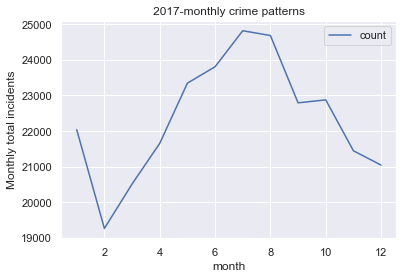

In [28]:
df["month"] = df.date_py.dt.month
p_monthly = plot_time( df, "month", "2017-monthly crime patterns")
_ = plt.ylabel("Monthly total incidents")

### Exercise 3:

#### 3.1

Which months have relatively higher crime rates? why?

**Answer.** Feburary has the lowest number of total incidents and the peak of crime incidents is reached in July. Overall, more incidents occurred during the summer. This makes sense because Chicago is cold and windy in the winter, and neither perpetrators nor victims like to be out and about much then!

#### 3.2

Modify the code provided above for monthly total incidents and instead plot the time series of daily total incidents throughout 2017. Do you still believe that February is the time when crime is least concerning?

**Answer.** One possible solution is given below:

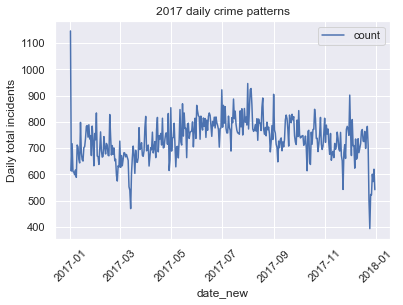

In [29]:
df["date_new"] = df.date_py.dt.date
# rotate the x-axis tick labels for better visualization
p_daily = plot_time( df, "date_new", "2017 daily crime patterns", rot = 45)
_ = plt.ylabel("Daily total incidents")

We can see that most of the days in March had lower total incidents than most of the days in February. So why do we observe a discrepancy between the monthly chart and daily chart? The reason is simple: February has 28 days whereas March has 31 days, so the monthly total of February is likely to be the smallest.

#### Using normalization for fair comparison (5 mts)

Therefore, if we want to compare level of crime across different months, monthly total is probably not a good metric since different months have different numbers of days. To resolve this issue, we will normalize the monthly total into some metric that does not depend on the number of days in a month. A natural choice is to divide monthly total by the number of days in a month. The normalized value is indeed the average daily incidents in a month, which can be compared across different months. Let's take a look at the results if we use this normalization; from this, it is clear that March is in fact the least concerning month:

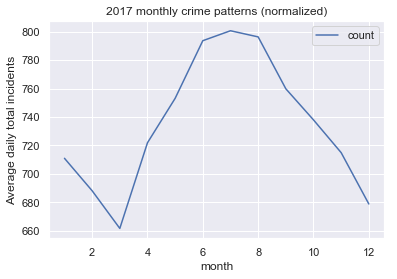

In [30]:
res = df.groupby(["month"])["ID"].count().reset_index(name="count")
res["count"] = res["count"]/[31,28,31,30,31,30,31,31,30,31,30,31]
_ = res.plot(x = "month", y = "count", title = "2017 monthly crime patterns (normalized)")
_ = plt.ylabel("Average daily total incidents")

We can visualize the total number of incidents that happened in a specific day of week and plot these counts across all days of week to examine the patterns we are looking for. But as in the case of monthly pattern, we need to normalize these raw counts since for example, there are different number of Mondays and Sundays in 2017. For a given day of week, we can divide the total number of incidents happened on that day of week by the total number of that day of week in 2017. The result is interpreted as the average daily total incidents. Note this average is across the whole year where the average we considered in the monthly trend case is only over a given month.

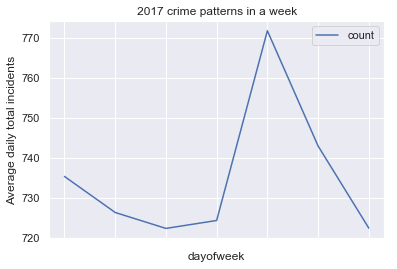

In [31]:
df["dayofweek"] = df.date_py.dt.dayofweek.astype("category")
df.dayofweek = df.dayofweek.cat.rename_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
res = df.groupby(["dayofweek"])['ID'].count().reset_index(name="count")
res['count'] = res['count']/pd.date_range("2017-1-1","2017-12-31",freq="D").dayofweek.value_counts()[::-1]
_ = res.plot(x="dayofweek", y = "count", title = "2017 crime patterns in a week")
_ = plt.ylabel("Average daily total incidents")

We can find that Friday has signifiantly higher total incidents compared to all other days of week. The lowest total incidents is reached on Wednesday.

### Investigating crime by geographic location (10 mts)

Another important dimension we need to consider is the relationship between crime incidents and geographic location. We have the rough geographic coordinate of each incident and based on these, we can explore the geographic patterns of crime in Chicago. To identify geographic hotspots of crimes, we can partition the City of Chicago into non-overlapping regions and count the total number of cases in 2017 in each region. In this case, we divide Chicago by police beats. We then visualize the results on the map:

In [11]:
# format the beat variable to have leading zeros, count by beat
df["beat_num"] = df["beat_num"].str.zfill(4)
beat_cn = df.groupby("beat_num")["ID"].count().reset_index(name="crime_count")

# color scheme
min_cn, max_cn = beat_cn['crime_count'].quantile([0.01,0.99]).apply(round, 2)

colormap = branca.colormap.LinearColormap(
    colors=['white','yellow','orange','red','darkred'],
    #index=beat_cn['count'].quantile([0.2,0.4,0.6,0.8]),b
    vmin=min_cn,
    vmax=max_cn
)

colormap.caption="Total crimes in Chicago by police beats"

In [19]:
# load the shape file for Chicago police beats
beat_orig = geopandas.read_file("Boundaries_beat.geojson", driver = "GeoJSON")
beat_data = beat_orig.join(beat_cn.set_index("beat_num"), how = "left", on = "beat_num")
beat_data.fillna(0, inplace = True)

In [13]:
# interactive visualization for beat-specific crime rate in 2017

m_crime = folium.Map(location=[41.88, -87.63],
                        zoom_start=12,
                        tiles="OpenStreetMap")
style_function = lambda x: {
    'fillColor': colormap(x['properties']['crime_count']),
    'color': 'black',
    'weight':2,
    'fillOpacity':0.5
}

stategeo = folium.GeoJson(
    beat_data.to_json(),
    name='Chicago beats',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['beat_num', 'crime_count'],
        aliases=['Beat', 'Total crime'], 
        localize=True
    )
).add_to(m_crime)

colormap.add_to(m_crime)
m_crime

Overall, we find there are three hotspots in Chicago: Downtown Chicago, West Chicago, and South Chicago. You can hover over each region to see the beat number and the total number of crimes in the beat.

### Exercise 4:

#### 4.1 (5 mts)

Based on the analysis so far, what are your preliminary strategies for police deployment based on times, locations and types of crimes? What is the potential business problem you are solving here?

**Answer**: Based on the results, we have several suggestions: put more police force to work on Fridays, between May and September, and place them in Downtown Chicago as well as the West and South Sides of Chicago. They probably need to focus on streets and residence areas and should pay attention to theft, battery, criminal damage and assault. 

#### 4.2  (10 mts)

What is the main shortcoming of our analysis and recommendations in 4.1?

**Answer:** We see two main pitfalls:

1. The above investigations are for individual patterns associated with each individual variable and the patterns associated with all these independent variables combined might not be independent. In other words, similar to the previous EDA case, there may exist interaction effects among these variables.

2. We noticed above that most crimes tend to be theft-related. However, most theft offenses are petty, which might not be the type of crime we should focus our limited police force on. More severe crimes, such as homicide cases, are overlooked in the above analyses since they are very rare. But perhaps these rare and severe crimes are the most important offenses to prevent.

The rest of this case study aims to tackle these two shortcomings.

## Investigating joint distributions and interactions 

In Exercise 4.2, we cited two potential problems with naively tacking together the patterns we noticed for each individual variable into a recommendation. We tackle the first issue to start: there may exist interaction effects among the variables of interest. Similar to the previous EDA case, we now investigate each potential interaction effect in more detail.

### Crime type vs. day of the week (5 mts)

Again, we can use a contingency table to answer this question just like we did for `Primary Type` and `Location Description`. One catch here is that you need to normalize the data so that the comparisons are fair across different days of the week:

In [20]:
res_raw = pd.crosstab(df["Primary Type"], df.dayofweek)
res_raw/pd.date_range("2017-1-1","2017-12-31",freq="D").dayofweek.value_counts().tolist()[::-1]

AttributeError: 'DataFrame' object has no attribute 'dayofweek'

### Exercise 5:

Your colleague claims that most thefts happen on Mondays, Tuesdays, or Wednesdays. How do you validate or disprove their claim based on the data and the table above? What can you say about the days which have the most battery and assault incidents?

**Answer.** From the results we see that Friday has the most theft cases (~10% more than other days) which disproves the first claim. Battery and assault have different patterns. Assault cases are more prevalent on weekdays than weekends (~10% more) while battery cases are more prevalent on weekends (~15% more). So deploying more police forces on Friday might not work for eliminating battery offenses.

### Crime time vs. Location of the crime (10 mts)

The next potential interaction is between crime time and crime location. The geographic hotspots might shift from time to time and targeting different regions at different times is a natural strategy to increase efficiency. The following map shows how the crime rate varies geographically over time. Here, the outcome of interest is average daily total incidents:

In [16]:
def folium_slider( beat_cn, beat_orig, tmp_drange, index_var, index_lab, 
                   value_var = "crime_count", caption = "Crimes in Chicago" ):
    # get colorbar
    min_cn, max_cn = beat_cn[value_var].quantile([0.01,0.99]).apply(round, 2)
    colormap = branca.colormap.LinearColormap(
        colors=['white','yellow','orange','red','darkred'],
        #index=beat_cn['count'].quantile([0.2,0.4,0.6,0.8]),
        vmin=min_cn,
        vmax=max_cn
    )
    colormap.caption=caption
    
    # get styledata for folium
    styledata = {}

    for beat in range(beat_orig.shape[0]):
        res_beat = beat_cn[beat_cn.beat_num==beat_orig.iloc[beat,:].beat_num]
        #fill missing value by zero: no recorded crime that month
        c_count = res_beat.set_index(index_var)[value_var].reindex(tmp_drange).fillna(0)
        df_tmp = pd.DataFrame(
            {'color': [colormap(count) for count in c_count], 'opacity':0.5},
            index = index_lab
        )
        styledata[str(beat)] = df_tmp
    
    styledict = {
        str(beat): data.to_dict(orient='index') for
        beat, data in styledata.items()
    }
    
    # plot map and time slider
    m = folium.Map(location=[41.88, -87.63],
                        zoom_start=12,
                        tiles="OpenStreetMap")

    g = TimeSliderChoropleth(
        beat_orig.to_json(),
        styledict=styledict
    ).add_to(m)

    folium.GeoJson(beat_orig.to_json(), style_function = lambda x: {
        'color': 'black',
        'weight':2,
        'fillOpacity':0
    }, tooltip=folium.GeoJsonTooltip(
            fields=['beat_num'],
            aliases=['Beat'], 
            localize=True
        )).add_to(m)

    colormap.add_to(m)
    
    return m

In [15]:
# cycle in a year
beat_cn_month = df.groupby(["beat_num","month"])["ID"].count().reset_index(name = "crime_count")
nd = pd.DataFrame({"month":range(1,13), "days":[31,28,31,30,31,30,31,31,30,31,30,31]})
beat_cn_month = beat_cn_month.merge(nd, how = "left", on = "month")
beat_cn_month["crime_count"] = beat_cn_month["crime_count"]/beat_cn_month["days"]
folium_slider( beat_cn_month, beat_orig, list(range(1,13)), "month",
               list(pd.date_range( "2017-1", "2017-12", freq = "MS").strftime("%Y-%m")),
               caption = "Average daily total incidents in a month")

KeyError: 'month'

### Exercise 6: (10 mts)

From the plot above, what patterns do you observe over time in Downtown Chicago, as well as the West and South Sides of Chicago? Based on this, do we need to refine the strategies we outlined in Exercise 4.1?

**Answer.** It is clear that Downtown Chicago remains a hotspot no matter which month we are looking at. Beat 0114 is a special region. It has elevated crime rate only in July and August, probably due to tourists.

West Side Chicago requires particular attention from April to October. Beat 1011 in this area is crime-prone year-round.

South Side Chicago has a hot period from April to August. Beat 0511 in this area has constantly high crime rate year-round while Beats 0833 and 0834 only have high crime rates in January.

As we can see, the strategies we developed in Exercise 4.1 need refinement. The above observations tell us that we need to deploy in different areas at different times of the year. May to August is a hot period for most of the regions we are concerned about but a few beats are swamped with criminal activity year-round.

### Interactions between different time scales (10 mts)

Our strategies developed in the previous section suggest that we should pay attention to Fridays as well as the moonths of May to August. However, is Friday always the most crime-prevalent day of the week regardless of the month we are looking at?

In [ ]:
res_md = df.groupby(['dayofweek','month'])['ID'].count().reset_index(name="count")
# normalization
date_2017 = pd.DataFrame( 
    {"dayofweek": pd.date_range("2017-1-1","2017-12-31",freq="D").dayofweek.astype("category"), 
     "month": pd.date_range("2017-1-1","2017-12-31",freq="D").month } )
date_2017["dayofweek"] = date_2017["dayofweek"].cat.rename_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
nd_2017 = date_2017.groupby(['month'])['dayofweek'].value_counts().sort_index().reset_index(name="day_count")
res_md_norm = nd_2017.merge( res_md, how = "left", on = ["month","dayofweek"]).fillna(0)
res_md_norm['count_norm'] = res_md_norm['count']/res_md_norm['day_count']

res_md_norm['dayofweek'] = res_md_norm['dayofweek'].astype("category").cat.reorder_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
res_md_norm['month'] = res_md_norm['month'].astype('category').cat.rename_categories(["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct","Nov","Dec"])
mp = sns.lineplot(data=res_md_norm, x='dayofweek', hue = 'month', y='count_norm', 
                  palette = sns.color_palette("hls",12))
mp = mp.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1)
_ = plt.ylabel("Average daily total crimes in a month")
_ = plt.title("Crime patterns across all days in a week in different months")
for i in range(12):
    tmp = res_md_norm[res_md_norm.dayofweek=="Sun"]
    _ = plt.text( 6, tmp['count_norm'].iloc[i], tmp['month'].iloc[i])

We can immediately spot that **not all months have the same day-of-week patterns**. Friday stands out as the crime rate peak in a week only in the non-summer months. In August, the peak shifts to Saturday and in June, there seems to be no apparent peak across a week. The results here tell us that our "Friday strategy" is probably not going to work during the summer, which unfortunately also happens to be the time of year with the highest crime rate overall.

This section has only explored three pairs of potential interactions across all pairs of variables we have. There are of course many other combinations that are important and will lead to further refinement of our deployment plan. We should be able to identify patterns associated with any pair of variables using the tools we developed here. After taking any interactions we find into account, we can then propose an actionable plan.

## Prioritizing by the severity of the crime: IUCR score

So far, we have based our analysis on just the total crime rate. But not all crimes are equally harmful. A homicide case would severely affect a neighbourhood even after several years and hinder business development in the area. On the other hand, a case of petty theft is usually not as destructive and would be dismissed after several weeks. 

We can define a different type of outcome which emphasizes crime types that need to be controlled to the minimal level. These crimes are generally determined by municipal development plans of Chicago. For example, if the government aims to promote tourism, crimes targeted at tourists, such as theft and deceptive activities should be the main focus of the police department.

In our dataset, the column `IUCR` is a reporting code that partially measures the damage of an incident to the general well-being to the public. Let's use this code to define a new type of outcome which roughly measures the accumulated damage of all crimes in an area over a period of time. The key idea is that we should focus on places and times that are harmed by crimes the most, not necessarily the ones with the highest total crime incidents.

### Crime severity: IUCR score (15 mts)

``IUCR`` column stands for Illinois Uniform Crime Reporting code, and we can find a full key [here](https://data.cityofchicago.org/Public-Safety/Chicago-Police-Department-Illinois-Uniform-Crime-R/c7ck-438e/data). 

In [ ]:
df['IUCR'].head()

The most important takeaway is that **as code number increases, the severity of associated crimes generally decreases**. Some of the IUCR codes have a letter after them (A, P, B, R, C, T, N). An examination of the above link shows that these letters are about convictions, which isn't too relevant to us, so we can just remove the letters and convert this column to a numeric type. Let's process the raw data and take a look at the distribution of `IUCR`:

In [ ]:
# This code processes the IUCR column to be truly numeric
iucr = (df['IUCR'].str.replace("A", "")
             .str.replace("P","")
             .str.replace("B","")
             .str.replace("R","")
             .str.replace("C","")
             .str.replace("T","")
             .str.replace("N","")
             .str.replace("E","")
             .str.replace("H","")
             .astype('int'))
_ = iucr.hist()

In [ ]:
iucr.describe()

We can see that most cases have a raw IUCR score smaller than 2000 and around 30% of cases have a raw IUCR score smaller than 500. This means that most cases in our dataset are considered to be at least moderately severe.

### Exercise 7: (5 mts)

Given these IUCR scores, how would you integrate them into our crime incidence visualizations so that the final results also represent the severity of crimes in a region?

**Answer.** In all our analysis above, each case is counted as one towards the total number of incidents. We can amplify the effect of certain types of crimes (e.g. homicide) with a predefined scaling factor, which represents that a single homicide case should be considered to be just as severe as many misdemeanors such as petty theft. By incorporate these scaling factors, regions with fewer but most severe cases would be identified as more dangerous compared to the results from the unweighted visualization. A rule-of-thumb is to choose the scaling factors to be positive and higher for more severe crimes.

Using the scoring scheme we discussed above, let's consider the monthly crime severity across police beats:

In [ ]:
# weighted incidence rate
iucr = iucr.fillna(0)
df["IUCR_num"] = iucr.max() - iucr
beat_cs_month = df.groupby(["beat_num","month"]).aggregate({"IUCR_num":lambda x: sum(x)}).reset_index()
nd = pd.DataFrame({"month":range(1,13), "days":[31,28,31,30,31,30,31,31,30,31,30,31]})
beat_cs_month = beat_cs_month.merge(nd, how = "left", on = "month")
beat_cs_month["severity_tot"] = beat_cs_month["IUCR_num"]/beat_cs_month["days"]
folium_slider( beat_cs_month, beat_orig, list(range(1,13)), "month",
              list(pd.date_range( "2017-1", "2017-12", freq = "MS").strftime("%Y-%m")),
              value_var = "severity_tot", caption = "Average daily crime severity in Chicago")

It seems that the results here are not significantly different from the results we obtained when we did not incorporate `IUCR`. This might be because most cases have relatively small raw IUCR and therefore tend to be relatively equally weighted even when we do incorporate `IUCR`.

### Defining a severity score based on the bigger-picture business problem

Since `IUCR` was not particularly useful, let's define a different severity metric. Generally, it is good practice to define a metric that aligns with the bigger-picture goal that the city is trying to achieve. For example, if we want to attract more large companies to open up branches in Chicago, we may care a lot about homicide, sexual assault and arson, but less about gambling, obscenity and theft. This type of analysis is rather subjective, but with experience in the field we should gain good intuition about how every type of crime should be bucketed. If we want to be more objective, we could include another dataset of crimes which have been classified by the dollar amount in losses caused by those crimes. We start with a subjective scoring system as an example:

In [ ]:
# The zip function creates a list of tuples out of two lists
# The first element of each tuple is the crime type from the first list, and the second element is the severity number

severity_10 = zip(['CRIM_SEXUAL_ASSAULT', 'ARSON', 'HOMICIDE'], [10] * 4)
severity_9 = zip(['BATTERY', 'ASSAULT','ROBBERY', 'BURGLARY'], [9] * 4)
severity_8 = zip(['MOTOR VEHICLE THEFT', 'PUBLIC PEACE VIOLATION',  'CRIMINAL DAMAGE'], [8] * 3)
severity_7 = zip(['CRIMINAL TRESPASS', 'OFFENSE INVOLVING CHILDREN', 'KIDNAPPING'], [7] * 3)
severity_6 = zip(['STALKING', 'PUBLIC INDECENCY'], [6] * 2)
severity_5 = zip(['OTHER OFFENSE', 'HUMAN TRAFFICKING'], [5] * 2)
severity_4 = zip(['DECEPTIVE PRACTICE', 'INTIMIDATION'], [4] * 2)
severity_3 = zip(['INTERFERENCE WITH PUBLIC OFFICER', 'SEX OFFENSE'], [3] * 2)
severity_2 = zip(['NARCOTICS', 'WEAPONS VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION','OBSCENITY'], [2] * 4)
severity_1 = zip(['THEFT','GAMBLING', 'PROSTITUTION', 'LIQUOR LAW VIOLATION', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON-CRIMINAL'], [1] * 5)

# By turning these zipped tuples into a dictionary, we can map each row of the dataset to its severity label
severities = dict()
for s in [severity_1, severity_2, severity_3, severity_4, severity_5, severity_6, severity_7, severity_8, severity_9, severity_10]:
    severities.update(dict(s))

# Our last step is mapping primary_type using this dictionary
df['severity_bus'] = df['Primary Type'].apply(severities.get)

This weighting scheme is suitable for visualizing average per-case severity but not for the total severity. The reason is that the range of the weights is rather small (1-10) and crimes with high weights are rare. As a result, the weighted sum given by this weighting scheme is very similar to the unweighted sum and visualizing the weighted sum does not provide additional information. The average per-case severity on the other hand is bounded between 1 and 10. So a small change (e.g. 0.1) in the average can still lead to apparent change in the filling color. Let's take a look at the updated average per-case severity score:

In [ ]:
# note that we still need to do normalization by days
beat_cs_month = df.groupby(["beat_num","month"]).aggregate({"severity_bus":lambda x: sum(x)}).reset_index()
nd = pd.DataFrame({"month":range(1,13), "days":[31,28,31,30,31,30,31,31,30,31,30,31]})
beat_cs_month = beat_cs_month.merge(nd, how = "left", on = "month")
beat_cs_month["severity_bus_tot"] = beat_cs_month["severity_bus"]/beat_cs_month["days"]
beat_cs_month["severity_bus_avg"] = beat_cs_month["severity_bus_tot"]/beat_cn_month["crime_count"]
folium_slider( beat_cs_month, beat_orig, list(range(1,13)), "month",
              list(pd.date_range( "2017-1", "2017-12", freq = "MS").strftime("%Y-%m")),
              value_var = "severity_bus_avg", caption = "Average crime severity in Chicago")

This map essentially shows the violent parts of Chicago, ignoring theft and putting emphasis on most violent crimes. Under this prioritization scheme, we see that Downtown Chicago is no longer the worst region; rather, the worst region has now become South Side Chicago. The "safe" North Side is now dotted with some rather violent beats.

## Conclusions (10 mts)

We explored Chicago crime records in 2017 to understand crime patterns and proposed preliminary policy deployment strategies based on these patterns. We initially examined the patterns associated with each variable of interest independently. Based on the single variable analyses, we proposed that the policy department should put extra forces to work on Fridays between May and August, pay more attention to theft, battery, assault and criminal damage, and deploy more forces in Downtown Chicago and the West and South Sides of Chicago.

We then conducted analyses for three pairs of variables and found that the above strategies are too rigid and don't take into account interaction effects. We found that Friday is a weekly hotspot outside of summertime, but during summertime, either Saturday becomes the hotspot or no hotspot was present at all. We also found that the time windows of high criminal activities for the three geographic hotspots are not the same: Downtown has a high rate throughout the year, whereas the crimes in the other two regions mostly accumulated between April and August. We found that theft is common in all kinds of locations whereas other types of crimes, such as battery and assault, tend to cluster in a very few number of location types.

In the last part of analysis, we looked at how to customize weights of different crimes based on the business outcome we were optimizing for. We considered a custom severity score, which highlights the extremely violent cases, and found out that many regions in Chicago have low overall crime incident counts but high violent crime rates. Downtown Chicago, on the other hand, did not harbor violent crimes despite its high overall crime rate. This indicates that if eliminating highly violent crimes is the priority, the previously devised strategies should be changed and there should be more emphasis placed on locations like North Side Chicago.

Moving forward, there are many things we can do. Using this dataset, we can explore other pairwise interaction effects. We can also examine if the strategies we proposed here have already been implemented and whether the deployment plan in use now is successful or not. We can also consider more advanced statistical modeling for our dataset so that all variables can be included, and not just the ones we examined. For those that are interested in this topic, a good starting point is [here](https://en.wikipedia.org/wiki/Spatial_analysis).

## Takeaways (5 mts)

In this case, we learned how to perform exploratory data analysis for records of crime. This type of data does not have as clear of an outcome of interest, so we started by assuming that the outcome of interest is the total number of crime incidents. From there, we followed a similar process as in the last EDA case, except:

1. When investigating variables of interest, we did not use correlation matrices because these make little sense for categorical variables.
2. Instead, we used tools such as frequency tables, word clouds, and contingency tables. We also used maps with a time slider to understand the spatial and temporal patterns.
3. We also learned the importance of normalization to ensure that you are making apples-to-apples comparisons.

Finally, we questioned our original assumption that the number of crime incidents was the most important outcome to optimize for. We also looked at how we ought to weight different crimes differently in our analysis based on the particular business problem at hand.